# Overregularization

based on https://arxiv.org/pdf/2303.14151.pdf, which was very interesting.

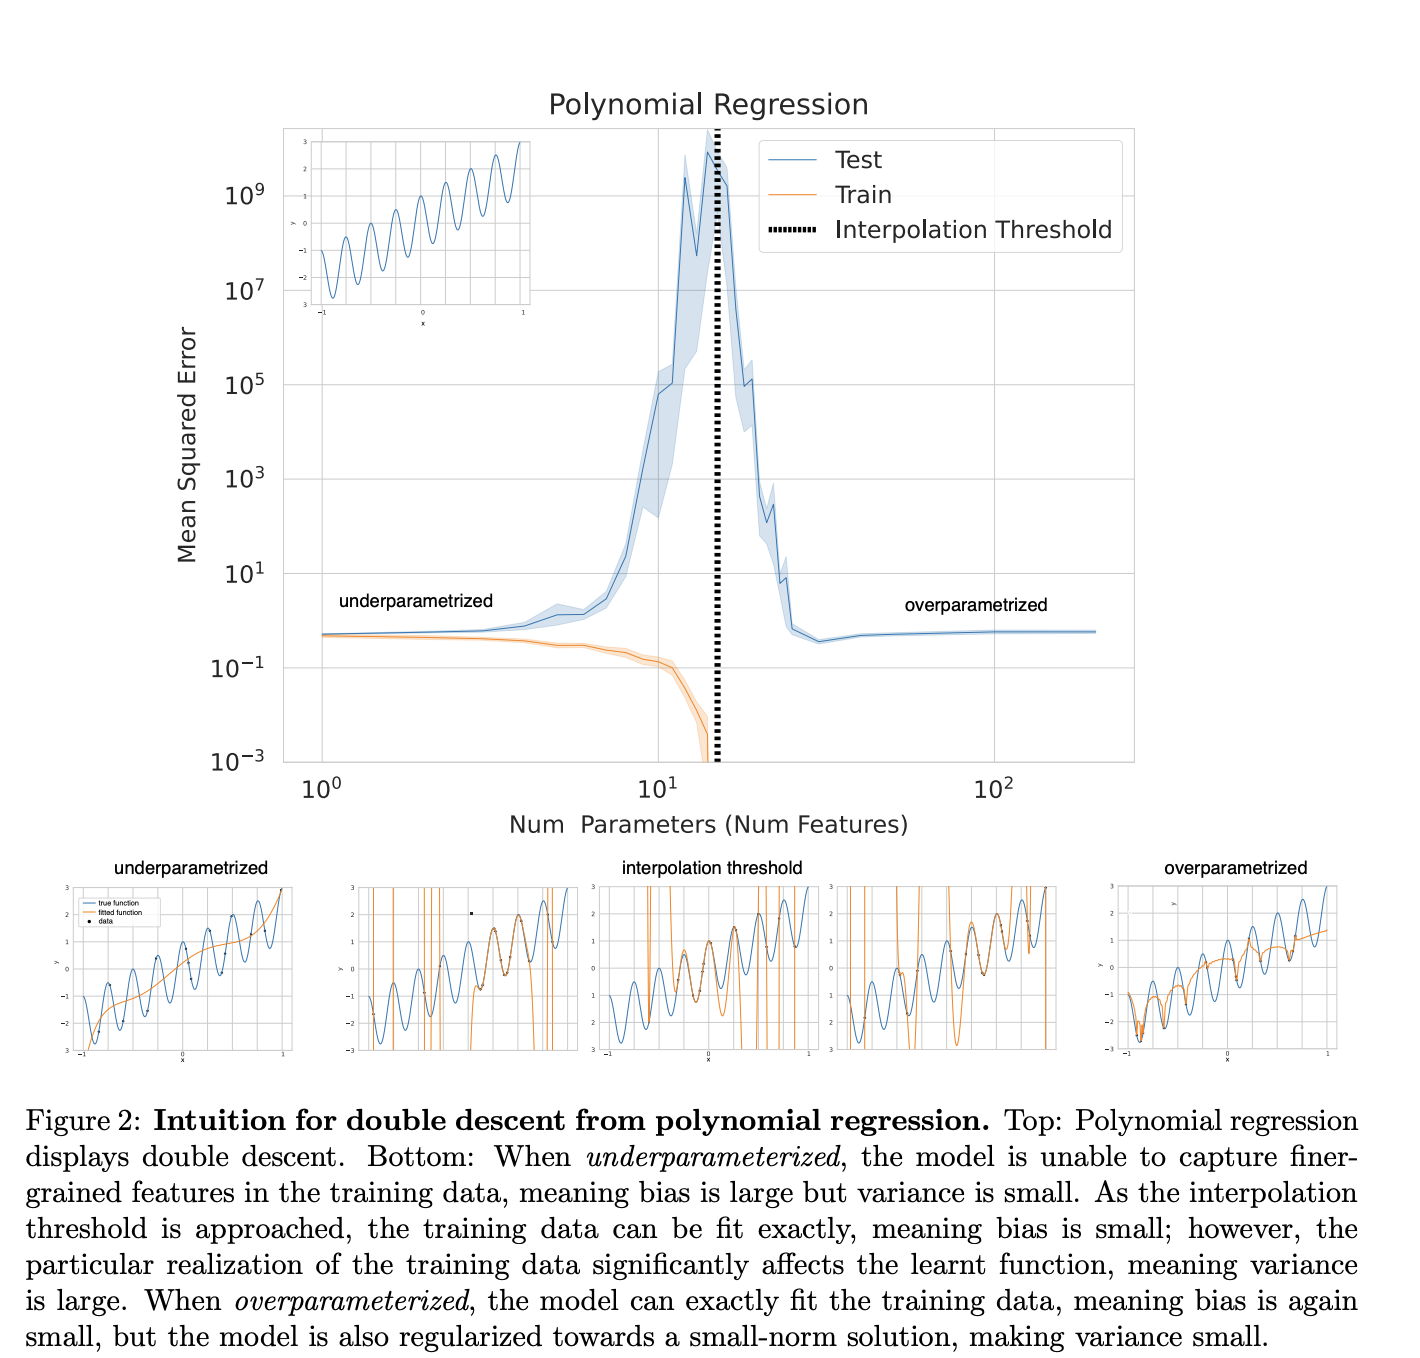

**Goals**
1. reproduce figure 2
2. make an equivalent figure for other regression techniques

The true function from the paper is $y(x) = 2x + cos(25x)$

Text(0.5, 1.0, 'True function')

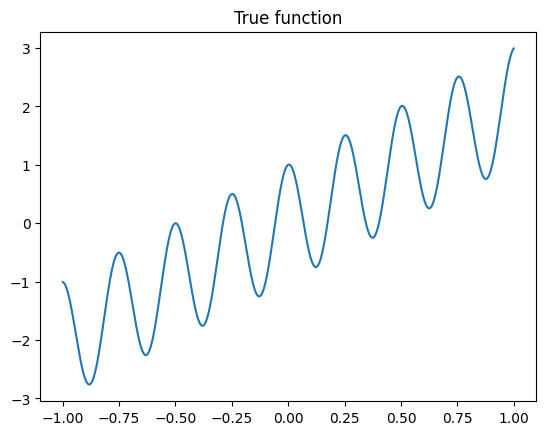

In [76]:
import numpy as np
import matplotlib.pyplot as plt

n = 10000
x = np.linspace(-1, 1, n)
y = 2*x + np.cos(25*x)

plt.plot(x, y)
plt.title("True function")

## With Polynomial Regression (original paper)

In [77]:
X_train

array([[ 0.8164],
       [ 0.7315],
       [ 0.2112],
       [ 0.0206],
       [-0.9307],
       [-0.4522],
       [-0.5672],
       [ 0.6067],
       [ 0.0382],
       [ 0.6678],
       [ 0.0396],
       [ 0.2056],
       [-0.8407],
       [-0.4469],
       [ 0.2074],
       [-0.9967],
       [ 0.2104],
       [-0.1066],
       [ 0.582 ],
       [ 0.1552]])

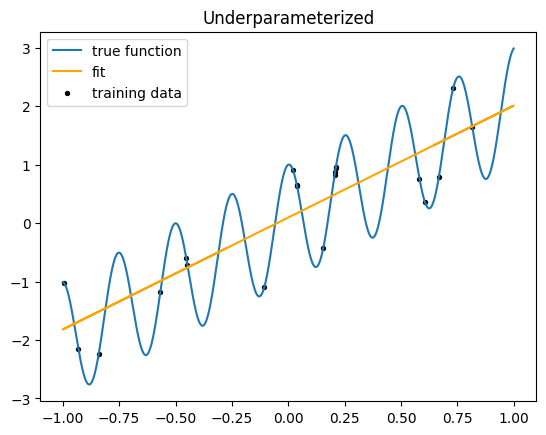

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split


d = 1
X = x[:, None]
n_train = 20

x_train = np.linspace(-1, 1, n_train)
rng = np.random.RandomState(0)
x_train = np.sort(rng.choice(x_train, size=20, replace=False))


PolynomialRegression = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
PolynomialRegression.fit(X=X_train, y=y_train)

yhat = PolynomialRegression.predict(X_test)

plt.plot(x, y, label='true function')
plt.plot(X_test, yhat, c='orange', label='fit')
plt.scatter(X_train, y_train, c='black', s=8, label='training data')
plt.title("Underparameterized")
plt.legend();

In [48]:
from sklearn.metrics import mean_squared_error as mse

mse(y_test, yhat)

0.5100563667410283

In [69]:
from numpy import log10 as log
def mse_at(d, return_yhat=False):
    PolynomialRegression = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
    PolynomialRegression.fit(X=X_train, y=y_train)
    yhat = PolynomialRegression.predict(X_test)
    mse_ = mse(y_test, yhat)
    if return_yhat:
        return mse_, yhat
    return mse(y_test, yhat)


## Plot as we scale up

In [79]:
yhats = []
ds = [1, 2, 10, 20, 30, 100]
for d in ds:
    _, yhat = mse_at(d, return_yhat=True)
    yhats.append(yhat)

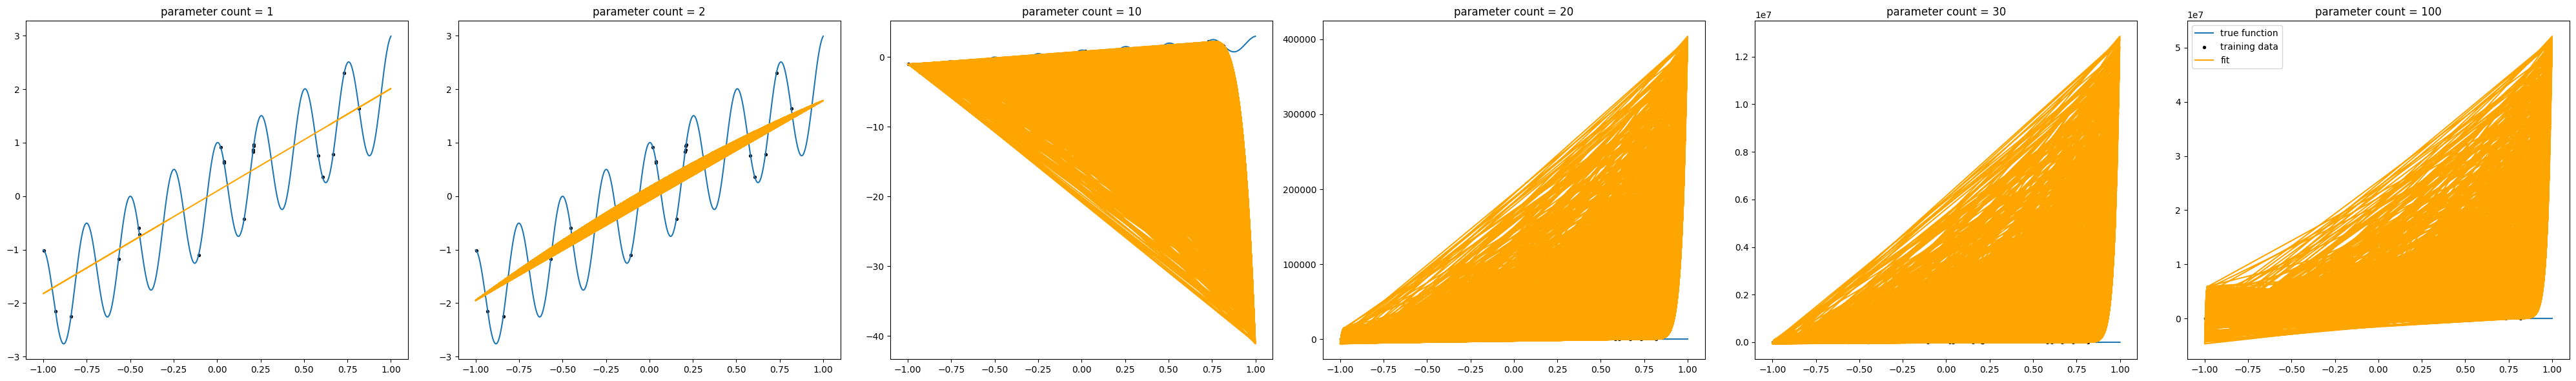

In [84]:
fig, axs = plt.subplots(1, len(ds), figsize=(40, len(ds)))

for i, ax in enumerate(axs.flatten()):
    ax.plot(x, y, label='true function')
    ax.scatter(X_train, y_train, c='black', s=8, label='training data')
    ax.plot(X_test, yhats[i], c='orange', label='fit')
    ax.set_title(f"parameter count = {ds[i]}")

plt.legend();
plt.tight_layout()

what the fuck is happening here

## Calculate mean squared error for a bunch of num features
-- dashed line is interpolation threshold

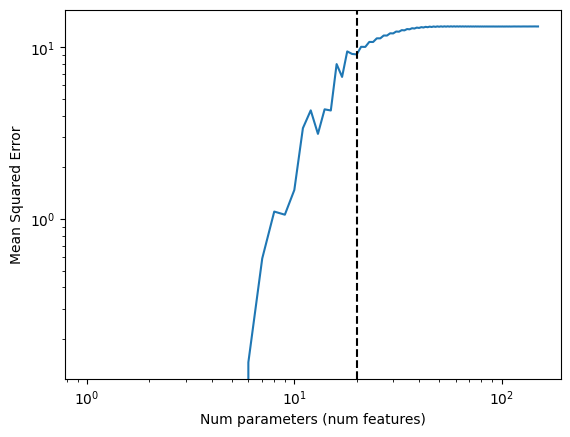

In [66]:
ds = [d for d in range(1,151)]
mses = [log(mse_at(d)) for d in ds]
plt.plot(ds, mses)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Num parameters (num features)')
plt.ylabel('Mean Squared Error')
plt.axvline(x=len(y_train), ls='--', c='black')

## I fucked up somewhere